In [6]:
import json
import talib
import pandas_ta as ta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.context import SparkContext
from pyspark.sql import functions as F
from pyspark.sql import SparkSession
from pyspark.sql.window import Window
from pyspark.sql.functions import lag
from pyspark.sql.functions import col

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

input_file = open('../../data/futures/ADA_USDT-1h-futures.json')
json_array = json.load(input_file)

# OHLCV

df = pd.DataFrame(json_array)
df.columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
df['Coin'] = "ADA"
df.tail()

,Time,Open,High,Low,Close,Volume,Coin
7259,1667127600000,0.4135,0.4156,0.4100,0.4130,31190329.0,ADA
7260,1667131200000,0.4130,0.4143,0.4084,0.4125,28175004.0,ADA
7261,1667134800000,0.4124,0.4132,0.4055,0.4072,42844919.0,ADA
7262,1667138400000,0.4071,0.4097,0.4053,0.4084,28265306.0,ADA
7263,1667142000000,0.4084,0.4092,0.4012,0.4025,39189085.0,ADA


<AxesSubplot: >

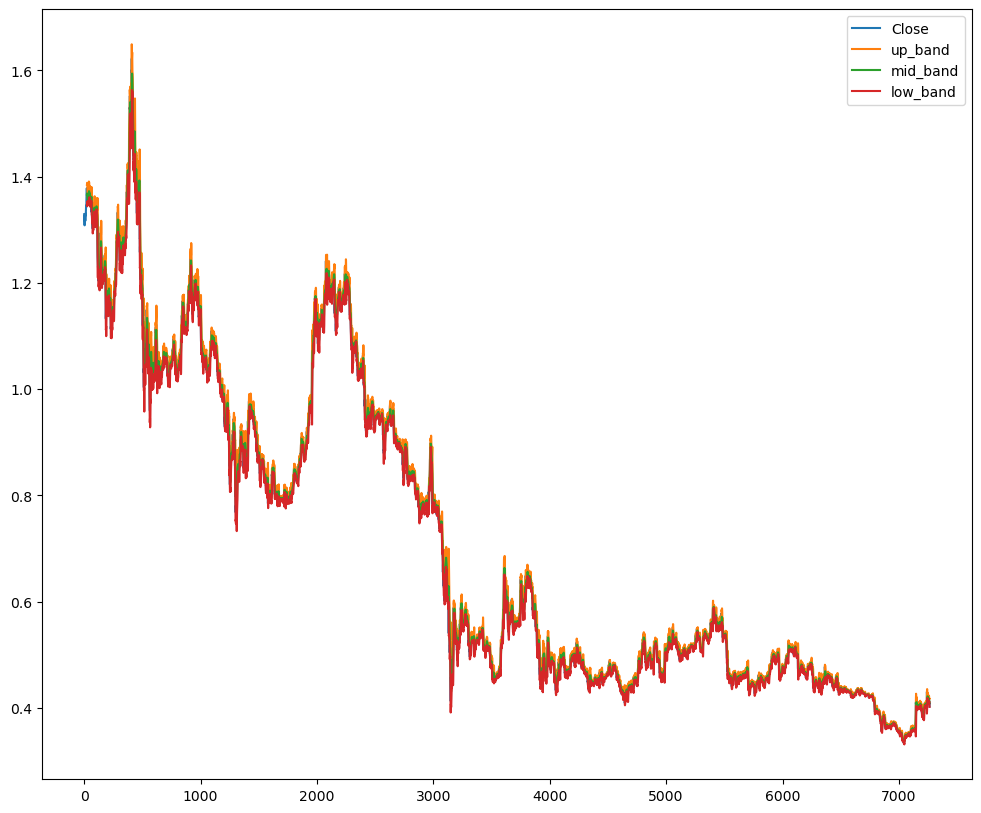

In [16]:
from talib import MA_Type

df['MA'] = talib.SMA(df['Close'],20)
df['up_band'], df['mid_band'], df['low_band'] = talib.BBANDS(df['Close'], matype=MA_Type.T3)
df[['Close','up_band','mid_band','low_band']].plot(figsize=(12,10))

In [10]:
print(real)

[10322354.20634915  3280743.71069697 -2186188.10118447 ...
  9044562.07367196 20607641.80094444 -5844990.57405534]
